In [5]:
import pandas as pd
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

In [6]:
# Import weather data from .txt file, skip first two rows
df = pd.read_csv("22_12_data.txt", header = None, skiprows = 2, parse_dates = [[0, 1]], dayfirst = True, sep = "\t")
df.head()

,0_1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,2022-12-01 00:30:00,9.8,9.8,9.7,89,8.1,8.0,SSE,4.0,18.0,...,23.1,43,9.8,22.6,8.11,1.1866,702,1,100.0,30
1,2022-12-01 01:00:00,9.8,9.9,9.8,88,7.9,8.0,SSE,4.0,18.0,...,23.3,43,10.0,22.8,8.09,1.1854,699,1,100.0,30
2,2022-12-01 01:30:00,10.1,10.1,9.8,88,8.2,10.0,SE,5.0,18.0,...,23.5,43,10.2,23.0,8.08,1.1844,703,1,100.0,30
3,2022-12-01 02:00:00,10.4,10.4,10.1,87,8.3,8.0,SSE,4.0,16.0,...,23.8,43,10.5,23.4,8.05,1.1826,679,1,99.3,30
4,2022-12-01 02:30:00,10.3,10.6,10.3,89,8.5,11.0,SE,5.5,22.0,...,24.1,43,10.7,23.7,8.05,1.1812,699,1,100.0,30


In [7]:
# Replace headers
header = ['DateTime', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.', 'Wind Speed',
 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index',
 'Bar', 'Rain', 'Rain Rate', 'Heat D-D', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew',
 'In Heat', 'In EMC', 'In Air Density', 'Wind Samp', 'Wind Tx', 'ISS Recept', 'Arc. Int.']

df.columns = header
df.head()

# Other values
# Solar Rad.', 'Solar Energy', 'Hi Solar Rad.', 'UV Index', 'UV Dose', 'Hi UV', 

,DateTime,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,2022-12-01 00:30:00,9.8,9.8,9.7,89,8.1,8.0,SSE,4.0,18.0,...,23.1,43,9.8,22.6,8.11,1.1866,702,1,100.0,30
1,2022-12-01 01:00:00,9.8,9.9,9.8,88,7.9,8.0,SSE,4.0,18.0,...,23.3,43,10.0,22.8,8.09,1.1854,699,1,100.0,30
2,2022-12-01 01:30:00,10.1,10.1,9.8,88,8.2,10.0,SE,5.0,18.0,...,23.5,43,10.2,23.0,8.08,1.1844,703,1,100.0,30
3,2022-12-01 02:00:00,10.4,10.4,10.1,87,8.3,8.0,SSE,4.0,16.0,...,23.8,43,10.5,23.4,8.05,1.1826,679,1,99.3,30
4,2022-12-01 02:30:00,10.3,10.6,10.3,89,8.5,11.0,SE,5.5,22.0,...,24.1,43,10.7,23.7,8.05,1.1812,699,1,100.0,30


In [10]:
# Get Month and Year of data for Labels and filenames
FileMonthYear = df['DateTime'][0].strftime('%y_%m')
MonthYear = str(df['DateTime'][0].month_name() + ' ' + str(df['DateTime'][0].year))

In [11]:
# Replace blank wind direction values with NaN
df['Wind Dir'].replace('---', np.nan, inplace=True)

# Replace Compass points with bearings
df['Wind Dir'].replace(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 
                            'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'], 
                        [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180,
                             202.5, 225, 247.5, 270, 292.5, 315, 337.5], inplace=True) 

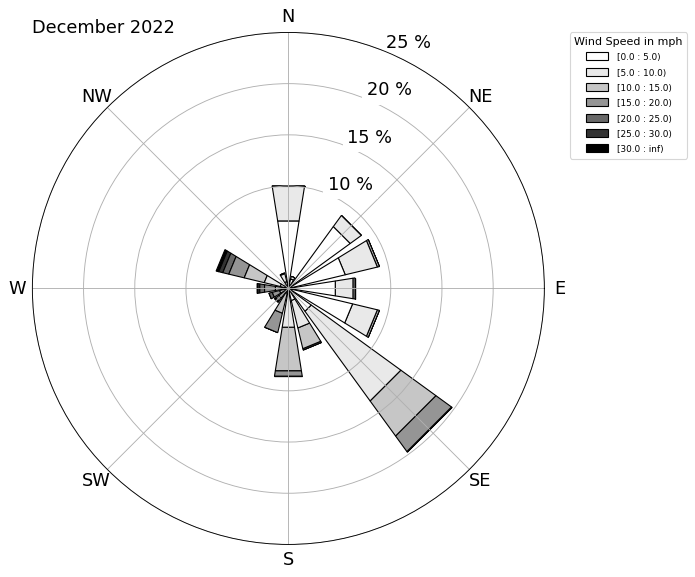

In [15]:
# Plot graph
from matplotlib.ticker import FormatStrFormatter

ax = WindroseAxes.from_ax()
ax.bar(df['Wind Dir'], df['Wind Speed'], cmap = cm.Greys, normed=True, 
           bins=np.arange(0, max(df['Wind Speed']), 5), opening = 0.8, edgecolor = 'black')

ax.set_xticklabels(['E', 'NE', 'N', 'NW','W', 'SW', 'S', 'SE'], fontsize = 16)

ax.set_legend()
ax.set_legend(title = 'Wind Speed in mph', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.yaxis.set_major_formatter(FormatStrFormatter('%d %'))

# Notes to help fit axis to data:
# (x, y, step = z)
# x is first tick, y is the max (add on one step size more), z is the step between ticks

ax.set_yticks(np.arange(10, 30, step = 5))
ax.set_yticklabels(np.arange(10, 30, step = 5), fontsize = 16, backgroundcolor = 'white')

ax.annotate(MonthYear, xy = (0,1), xycoords='axes fraction', fontsize = 16)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))

ax.figure.savefig(FileMonthYear + '_windrose.png', bbox_inches='tight', dpi = 600)